In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Image analysis primer

A short lecture regarding a few useful things to know about images in the context of machine learning.

## Objectives

By end of this lecture you should be able to:

* Able to load and view images with `skimage`
* Explain what an image's `dtype` and dimensions mean
* Do a few numpy image tricks (cropping, color channel selection)
* Use `skimage` filters
* Explain a convolution
* Flatten images to use them as feature vectors

## Load images with `skimage` or `imageio`

You may have to install it with `$ pip install scikit-image`

In [2]:
from skimage.io import imread, imshow

Just give it a string filename.

In [3]:
im = imread("data/dog.jpg")

If `sklearn` can't read your file, try the `imageio` library.

## View images with imshow

`plt` and `skimage` have similar but slightly different implementations of `imshow`.

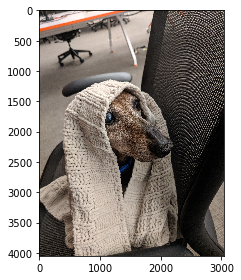

In [4]:
imshow( im )

## Images are matrices

The best practices for image files in Python is to store them in `numpy`-style arrays.

`skimage` has its own array type, but it's just `np.ndarray` under the hood.

In [5]:
type(im)

numpy.ndarray

In [6]:
im

array([[[106,  94,  82],
        [110,  98,  86],
        [111,  99,  87],
        ...,
        [ 97,  96,  52],
        [ 95,  97,  47],
        [ 94,  99,  41]],

       [[106,  94,  82],
        [109,  97,  85],
        [114, 102,  90],
        ...,
        [ 95,  93,  52],
        [ 93,  95,  48],
        [ 96,  98,  48]],

       [[107,  93,  82],
        [106,  94,  82],
        [114, 102,  90],
        ...,
        [ 89,  87,  49],
        [ 85,  86,  46],
        [ 89,  90,  50]],

       ...,

       [[ 28,  23,  29],
        [ 29,  24,  30],
        [ 34,  29,  35],
        ...,
        [ 61,  46,  39],
        [ 58,  41,  34],
        [ 58,  41,  34]],

       [[ 28,  21,  28],
        [ 28,  21,  28],
        [ 30,  25,  29],
        ...,
        [ 62,  47,  40],
        [ 58,  41,  34],
        [ 57,  40,  33]],

       [[ 30,  24,  28],
        [ 29,  23,  27],
        [ 30,  25,  29],
        ...,
        [ 60,  45,  38],
        [ 58,  41,  34],
        [ 60,  43,  36]]

### Image `dtype`s.

Images arrays come in multiple "data types". This refers to the way the pixels are encoded as bytes. One common format is `uint8`; an unsigned 8-bit integer. `float32` and `float64` are both common. You need to know this because many libraries expect images to be a particular dtype format and will throw an error if they encounter something they don't expect.

`uint8` numbers are always integers between 0 and 255. If you see a bunch of numbers between 0 and 255, your image is probably stored as `uint8`.

### Image matrix shape

Color images are stored in _three dimensional_ matrices. 
* The first dimension is usually the height dimension starting from the _top_ of the image. 
* The second dimension is usually the width, starting from the left.
* The third dimension is usually the color. This is the "channel" dimension.

For example, the 0th row (the top), the 0th column (the left), and the 0th color (usually red) can be fetched from the image with:

In [7]:
im[0,0,0] #an unsigned integer

106

* **question** How would I grab a crop of the image?
* **question** How would I grab a single color channel?

Monochrome images may be store as matrices with a single channel (i.e., a matrix with shape `(n_rows, n_cols, 1)`), or a 2d-matrix (shape of `(n_rows, n_cols)`).

Images may sometimes have a fourth channel for transparency ("alpha channel"), or store the colors in an order other than the standard red-green-blue.

### `numpy` tricks with images

* Get a greyscale image: just average across the color dimension. This wouldn't really work if one of the channels is the alpha channel. 

In [8]:
im_bw = im.mean(axis=2)

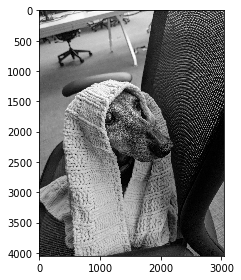

In [9]:
imshow( im_bw.astype(np.uint8) )

Get a list of all pixels

In [10]:
im.reshape(-1,3)

array([[106,  94,  82],
       [110,  98,  86],
       [111,  99,  87],
       ...,
       [ 60,  45,  38],
       [ 58,  41,  34],
       [ 60,  43,  36]], dtype=uint8)

Get the average color:

In [11]:
im.reshape(-1,3).mean(axis=0)

array([110.10424454, 100.27558413,  92.6581607 ])

Think of some of your own!

## skimage is full of useful tricks

Some of these are easy to do with `numpy` tricks, but some are kind of hard, like resize and rotation:

In [12]:
from skimage.transform import resize, rotate

In [13]:
im_prime = rotate( resize(im, (300,300)), 30 )

In [14]:
im_prime.shape #still just a matrix

(300, 300, 3)

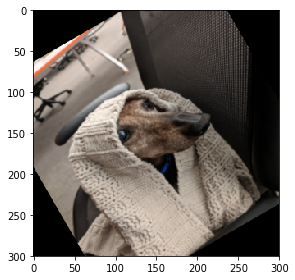

In [15]:
imshow( im_prime )

## skimage filters

In [16]:
from skimage.filters import hessian

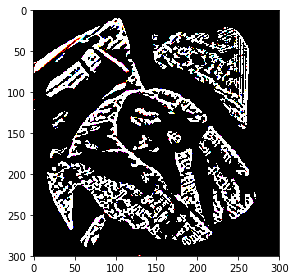

In [17]:
imshow( hessian( im_prime ) )

Have fun exploring! Filters can be useful for featurizing an image in preparation for supervised learning. We'll go more into the value of filters in the afternoon. 

## Convolution filters

A 2d convolution is the result of taking the dot product of a "kernal" against a region surrounding every pixel in an image. For example, here's a 2x2 kernal:

In [18]:
from skimage.filters.edges import convolve

In [19]:
kernal = np.array([[-1,0,1],
                   [-1,0,1],
                   [-1,0,1]])

small_bw = -resize(im_bw, (200,200))
convolved_bw = convolve(small_bw, kernal)

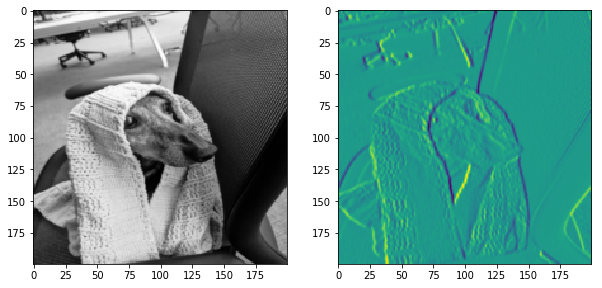

In [20]:
fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].imshow( small_bw, cmap="Greys" )
ax[1].imshow( convolved_bw )

### Multichannel convolution kernal

An image with multiple channels can be convolved by a kernal with the same number of channels. The convolution involves (for every pixel) taking a region from the image _in all channels_, and then taking the dot product with respect to the flattened kernal and region.

This is the way it works in convnets, but generally not how multichannel convolutions are implemented in image processing libraries.

## Review: coping with high-dimensional arrays

Image processing, and convolutional neural networks in particular, make heavy use of high-dimensional arrays.

By this point we've had a lot of experience with 2d arrays, like a black an white image:

In [21]:
type( small_bw ) #here's an ndarray

numpy.ndarray

In [22]:
small_bw.shape

(200, 200)

We can think of this as being a "grid" of numbers, where the first dimension is the "vertical" dimension, and the second dimension is the "horizontal" dimension. This spatial reasoning is okay, and even sort of extends to 3-dimensional arrays, such as a multichannel image:

In [23]:
type( np.array(im) ) #it's an ndarray - once we convert it into one, anyway

numpy.ndarray

In [24]:
im.shape

(4048, 3036, 3)

The third dimension in a 3-dimensional matrix can be thought of as the "depth" dimension. This array is 4048 "high", 3036 "wide" and 3 layers "deep".

In [25]:
# for the following example: make a 4d array

imstack = np.stack( [im[0:100, 0:100], 
                     im[100:200, 100:200],
                     im[200:300, 200:300],
                     im[300:400, 300:400]] ) # stack of three crops from the image

This image stack is a 4-dimensional array with shape:

In [26]:
imstack.shape

(4, 100, 100, 3)

How can we think about this spatially? Generally we can't, and it's best to abandon spatial thinking altogether.

Instead, think of each dimension by its _meaning_.

In **this** `ndarray`, the meanings of thre four dimensions are:
* image
* row
* column
* color channel

And once we're clear on this, it becomes easy to use slicing notation to get what we want from it:


What if we want just the blue channel from just the second image?

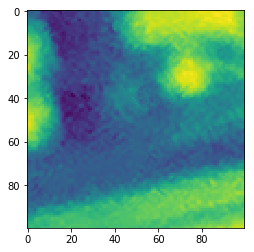

In [27]:
plt.imshow( imstack[1, :, :, 2] ) #just the second image, every row, every column, just the blue channel

With this way of thinking, the multidimensional transpose operator starts making more sense. For example maybe we don't want the first dimension to be the image, maybe we want it be the _last_ dimension. We can use transpose for that:

In [28]:
imstack_prime = imstack.transpose(1,2,3,0) #move the image dimension to the last

imstack_prime.shape 

(100, 100, 3, 4)

Now the meaning of the dimensions are:
* row
* column
* color channel
* image

**question** what kind of `ndarray` would you use to store a movie clip? How about a set of clips?

## Images in machine learning

Sometimes a bunch of images come in the form of a "stack" of matrices:

In [29]:
from sklearn import datasets

digits = datasets.load_digits()

In [30]:
X = digits.images
y = digits.target

It's a 3-dimensional matrix, where the first dimension is the image, the second width, the third height:

In [31]:
X.shape

(1797, 8, 8)

This is a convenient format for viewing:

/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:78: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


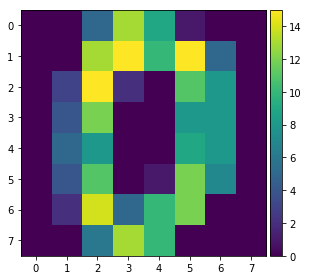

In [32]:
imshow( X[0] )

But most supervised learning implementations want a 2-d matrix `X`.

By far the most simple thing to do is simply squash each layer in the stack to a row, using `np.reshape`.

In [33]:
n_samples, n_cols, n_rows = X.shape
#the -1 means, "make this dimension whatever length it needs to be for the shape to work out"
#in this case, it stands in for '64'
X = X.reshape(n_samples, -1) 

In [34]:
X.shape

(1797, 64)

Ah, now we're on familiar ground.

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y) # train test split
clf = RandomForestClassifier(n_estimators=100)           # make model
clf.fit(X_train,y_train)                                 # fit to train
yhat = clf.predict(X_test)                               # predict on test
print( accuracy_score(y_test, yhat) )                    # score prediction

0.9755555555555555


Nice. It doesn't have to be hard.